<a href="https://colab.research.google.com/github/SK-0911/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

**Recommender System** is a system that seeks to predict or filter preferences according to the user's choices. Recommender systems are
utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.
Recommender systems produce a list of recommendations in any of the two ways -

**Collaborative filtering:** Collaborative filtering approaches build a model from the user's past behavior (i.e. items purchased or searched by the
user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that users may have an
interest in

**Content-based filtering:** Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend
additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user's
preferences. It recommends items based on the user's past preferences. Let's develop a basic recommendation system using Python and
Pandas.

Let's develop a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. It just tells
what movies/items are most similar to the user's movie choice,

# Import Library

In [ ]:
import pandas as pd
import numpy as np

# Import Dataset

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv')
df.head(3)

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
df.isnull().sum()

Movie_ID                       0
Movie_Title                    0
Movie_Genre                    0
Movie_Language                 0
Movie_Budget                   0
Movie_Popularity               0
Movie_Release_Date             0
Movie_Revenue                  0
Movie_Runtime                  2
Movie_Vote                     0
Movie_Vote_Count               0
Movie_Homepage              3061
Movie_Keywords               387
Movie_Overview                 3
Movie_Production_House         0
Movie_Production_Country       0
Movie_Spoken_Language          0
Movie_Tagline                818
Movie_Cast                    27
Movie_Crew                     0
Movie_Director                22
dtype: int64

In [ ]:
df.shape

(4760, 21)

In [ ]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

# Feature selection

In [ ]:
features = df[['Movie_Genre', 'Movie_Language', 'Movie_Keywords', 'Movie_Cast', 'Movie_Director']].fillna('')

Selected five existing features to recommend movies. It may vary from one project to another. Like one can add vote counts, budget, language
etc.

In [ ]:
features.shape

(4760, 5)

In [ ]:
features.head(3)

,Movie_Genre,Movie_Language,Movie_Keywords,Movie_Cast,Movie_Director
0,Crime Comedy,en,hotel new year's eve witch bet hotel room,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,en,android galaxy hermit death star lightsaber,Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,en,father son relationship harbor underwater fish...,Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton


In [ ]:
X = features['Movie_Genre'] + ' ' + features['Movie_Language'] + ' '  + features['Movie_Keywords'] + ' ' + features['Movie_Cast'] + ' ' + features['Movie_Director']

In [ ]:
X.head(3)

0    Crime Comedy en hotel new year's eve witch bet...
1    Adventure Action Science Fiction en android ga...
2    Animation Family en father son relationship ha...
dtype: object

In [ ]:
X.shape

(4760,)

# Convert Feature Text into Tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## **TF-IDF**

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.

Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is.

Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term's occurrences are scattered throughout all the documents. IDF can be calculated as follow:

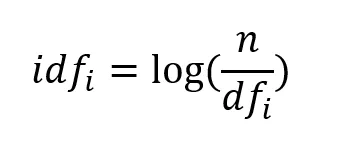

Where idfᵢ is the IDF score for term i, dfᵢ is the number of documents containing term i, and n is the total number of documents. The higher the DF of a term, the lower the IDF for the term. When the number of DF is equal to n which means that the term appears in all documents, the IDF will be zero, since log(1) is zero, when in doubt just put this term in the stopword list because it doesn't provide much information.

The TF-IDF score as the name suggests is just a multiplication of the term frequency matrix with its IDF, it can be calculated as follow:

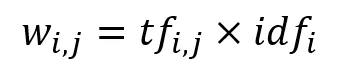

Where wᵢⱼ is TF-IDF score for term i in document j, tfᵢⱼ is term frequency for term i in document j, and idfᵢ is IDF score for term i.

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(X)

In [ ]:
print(X)

  (0, 452)	0.2527893450771156
  (0, 341)	0.221714115400248
  (0, 13242)	0.22681105601214802
  (0, 8329)	0.22016866775539004
  (0, 8129)	0.25688428990116646
  (0, 1143)	0.2615267554483384
  (0, 6623)	0.15166228960926623
  (0, 978)	0.21459405931249442
  (0, 552)	0.20761737187069065
  (0, 11304)	0.22333146968371728
  (0, 13192)	0.16244539866426566
  (0, 11266)	0.2350295485803124
  (0, 1316)	0.2527893450771156
  (0, 14461)	0.19761557316518416
  (0, 4296)	0.23067802069223262
  (0, 14623)	0.24912629210986972
  (0, 9435)	0.14712533809566203
  (0, 6098)	0.3906448451315794
  (0, 4159)	0.036990694054009246
  (0, 2772)	0.07008337800624968
  (0, 3042)	0.10107356482125734
  (1, 7984)	0.19926350047622196
  (1, 5074)	0.15881759195282208
  (1, 5455)	0.26005463729140177
  (1, 278)	0.20253990390975216
  :	:
  (4757, 11875)	0.17391829275855464
  (4757, 9481)	0.2097939447065153
  (4757, 4587)	0.14519125328802765
  (4757, 2538)	0.1862316778438991
  (4757, 7155)	0.19960099766843914
  (4757, 13151)	0.0874305

# Get Similarity Score using Cosine Similarity

cosine_similarity computes the L2-normalized dot product of vectors. Euclidean (L2) normalization projects the vectors onto the unit sphere,
and their dot product is then the cosine of the angle between the points denoted by the vectors.

In [ ]:
from sklearn.metrics.pairwise import cosine_simliarity

ImportError: ignored

In [ ]:
!pip install cosine-similarity 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
